Um diesen Notebook zum laufen zu bringen, muss man folgende imports ausführen.

In [44]:
import sys
sys.path.append('..')
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from db_init import db_get_df, db_save_df
import glob
import json
import requests
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import download




<h1>Data visualization</h1>

This Notebook focuses on visualizing the data we got so that it may be easier to understand them. In the long run it helps us solve different errors (like null entries) and make predictions about why certain Algorithms or Embeddings are not as useful as they seemed to be.

First we load the whole Data from the Database

In [4]:
df = db_get_df("intranet_html_attributes")

In [21]:
def has_invalid_characters(text):
    weird_char_pattern = re.compile(r'[\x00-\x08\x0B\x0C\x0E-\x1F]')
    return bool(weird_char_pattern.search(text))

df = df[df["html"].apply(lambda x: not has_invalid_characters(x))]
df.reset_index(drop=True, inplace=True)

In [22]:
print(df["html"])

0       <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
1       <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
2       <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
3       <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
4       <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
                              ...                        
1663    <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
1664    <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
1665    <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
1666    <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
1667    <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...
Name: html, Length: 1668, dtype: object


In [23]:
print(df["html"][2])

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html
    PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="de" lang="de">
<head>

<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<!-- 
	This website is powered by TYPO3 - inspiring people to share!
	TYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.
	TYPO3 is copyright 1998-2020 of Kasper Skaarhoj. Extensions are copyright of their respective owners.
	Information and contribution at http://typo3.org/
-->



<title>Technische Hochschule Nürnberg: Ältestenrat</title>
<meta name="generator" content="TYPO3 CMS" />
<meta name="KEYWORDS" content="Technische Hochschule Nürnberg Georg-Simon-Ohm, TH Nürnberg, Studium" />
<meta name="DESCRIPTION" content="Die TH Nürnberg ist mit rund 13.000 Studierenden bundesweit eine der größten Hochschulen.

In [20]:
print(f"Wir haben insgesamt {len(df)} verschiedene Webseiten gescraped")
print("2 Beispiele der Daten sind")
print(df.sample(2))

Wir haben insgesamt 1686 verschiedene Webseiten gescraped
2 Beispiele der Daten sind
                                                  link  \
192  /seitenbaum/hochschule/profil/statistik/sommer...   
36   /seitenbaum/hochschule/profil/statistik/winter...   

                                                  html  \
192  <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...   
36   <?xml version="1.0" encoding="utf-8"?>\n<!DOCT...   

                                                  text  \
192  Statistik für das Sommersemester 2009 Studiere...   
36   Statistik für das Wintersemester 2014/2015 13....   

                                                 title  
192  Technische Hochschule Nürnberg: Sommersemester...  
36   Technische Hochschule Nürnberg: Wintersemester...  


Der Text auf diese Webseiten ist dabei im Schnitt 

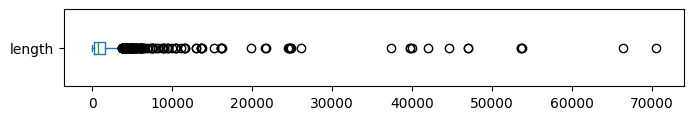

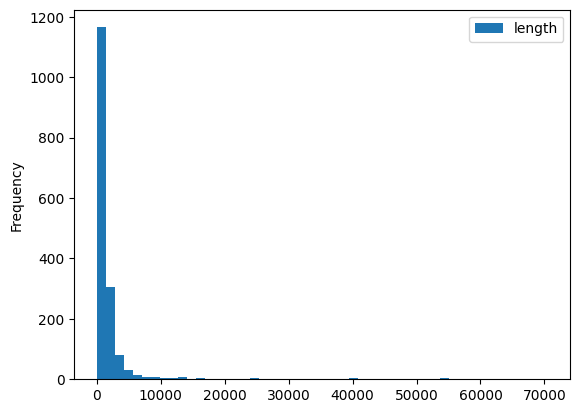

In [24]:

df['length'] = df['text'].map(len)
df['length'].plot(kind='box', vert=False, figsize=(8, 1))
plt.show()
df[df["length"].eq(0) == False].plot(kind='hist', bins=50)
plt.show()

Die Webseite mit den meisten Text ist : https://intern.ohmportal.de/institutionen/fakultaeten/betriebswirtschaft/online-services/news/newsarchiv-2016/april-mai-juni/page.html

In [35]:
pd.set_option('display.max_colwidth', None)
most_text = df.sort_values("length", ascending=False)
print(most_text["link"].head(10))

1021               /institutionen/fakultaeten/betriebswirtschaft/online-services/news/newsarchiv-2016/april-mai-juni/page.html
1019    /institutionen/fakultaeten/betriebswirtschaft/online-services/news/newsarchiv-2016/oktober-november-dezember/page.html
1022    /institutionen/fakultaeten/betriebswirtschaft/online-services/news/newsarchiv-2015/oktober-november-dezember/page.html
803          /institutionen/fakultaeten/bauingenieurwesen/die-fakultaet/labore/verkehrswesen/wwwmobilohmde/aktuelles/page.html
1239            /seitenbaum/fakultaeten/bauingenieurwesen/die-fakultaet/labore/verkehrswesen/wwwmobilohmde/aktuelles/page.html
1223                          /seitenbaum/fakultaeten/bauingenieurwesen/bi-und-die-oeffentlichkeit/mittwochsakademie/page.html
370                        /institutionen/fakultaeten/bauingenieurwesen/bi-und-die-oeffentlichkeit/mittwochsakademie/page.html
1017               /institutionen/fakultaeten/betriebswirtschaft/online-services/news/newsarchiv-2017/april-mai

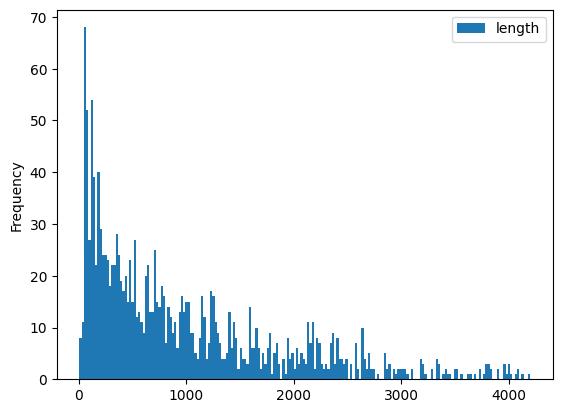

In [36]:
most_text[most_text["length"].eq(0) == False][100:].plot(kind='hist', bins=200)
plt.show()


Webseiten mit keinem Inhalt: nur 17 Seiten.

In [37]:
df[df["length"].eq(0)].count()


link      17
html      17
text      17
title     17
length    17
dtype: int64

In [39]:
least_text = df.sort_values("length", ascending=True).head(10)
print(least_text["link"])

1573                                                                           /institutionen/fakultaeten/sozialwissenschaften/praktikum-ba/die-passende-praktikumsstelle/page.html
14                                        /institutionen/fakultaeten/maschinenbau-und-versorgungstechnik/mb-intern/fakultaet/labore/rechnergestuetzte-konstruktion/raeume/page.html
335                                                                                                                 /institutionen/fakultaeten/nuernberg-school-of-health/page.html
336                                                                                                                    /seitenbaum/fakultaeten/nuernberg-school-of-health/page.html
471                                                                                                                                   /institutionen/international-office/page.html
1222                                                              /seitenbaum/fakultaeten/bauingenie

Wordcloud mit allen Worten
TODO: sortiere häufigdte Wörter aus, lemmatisieren, deutsch-englisch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


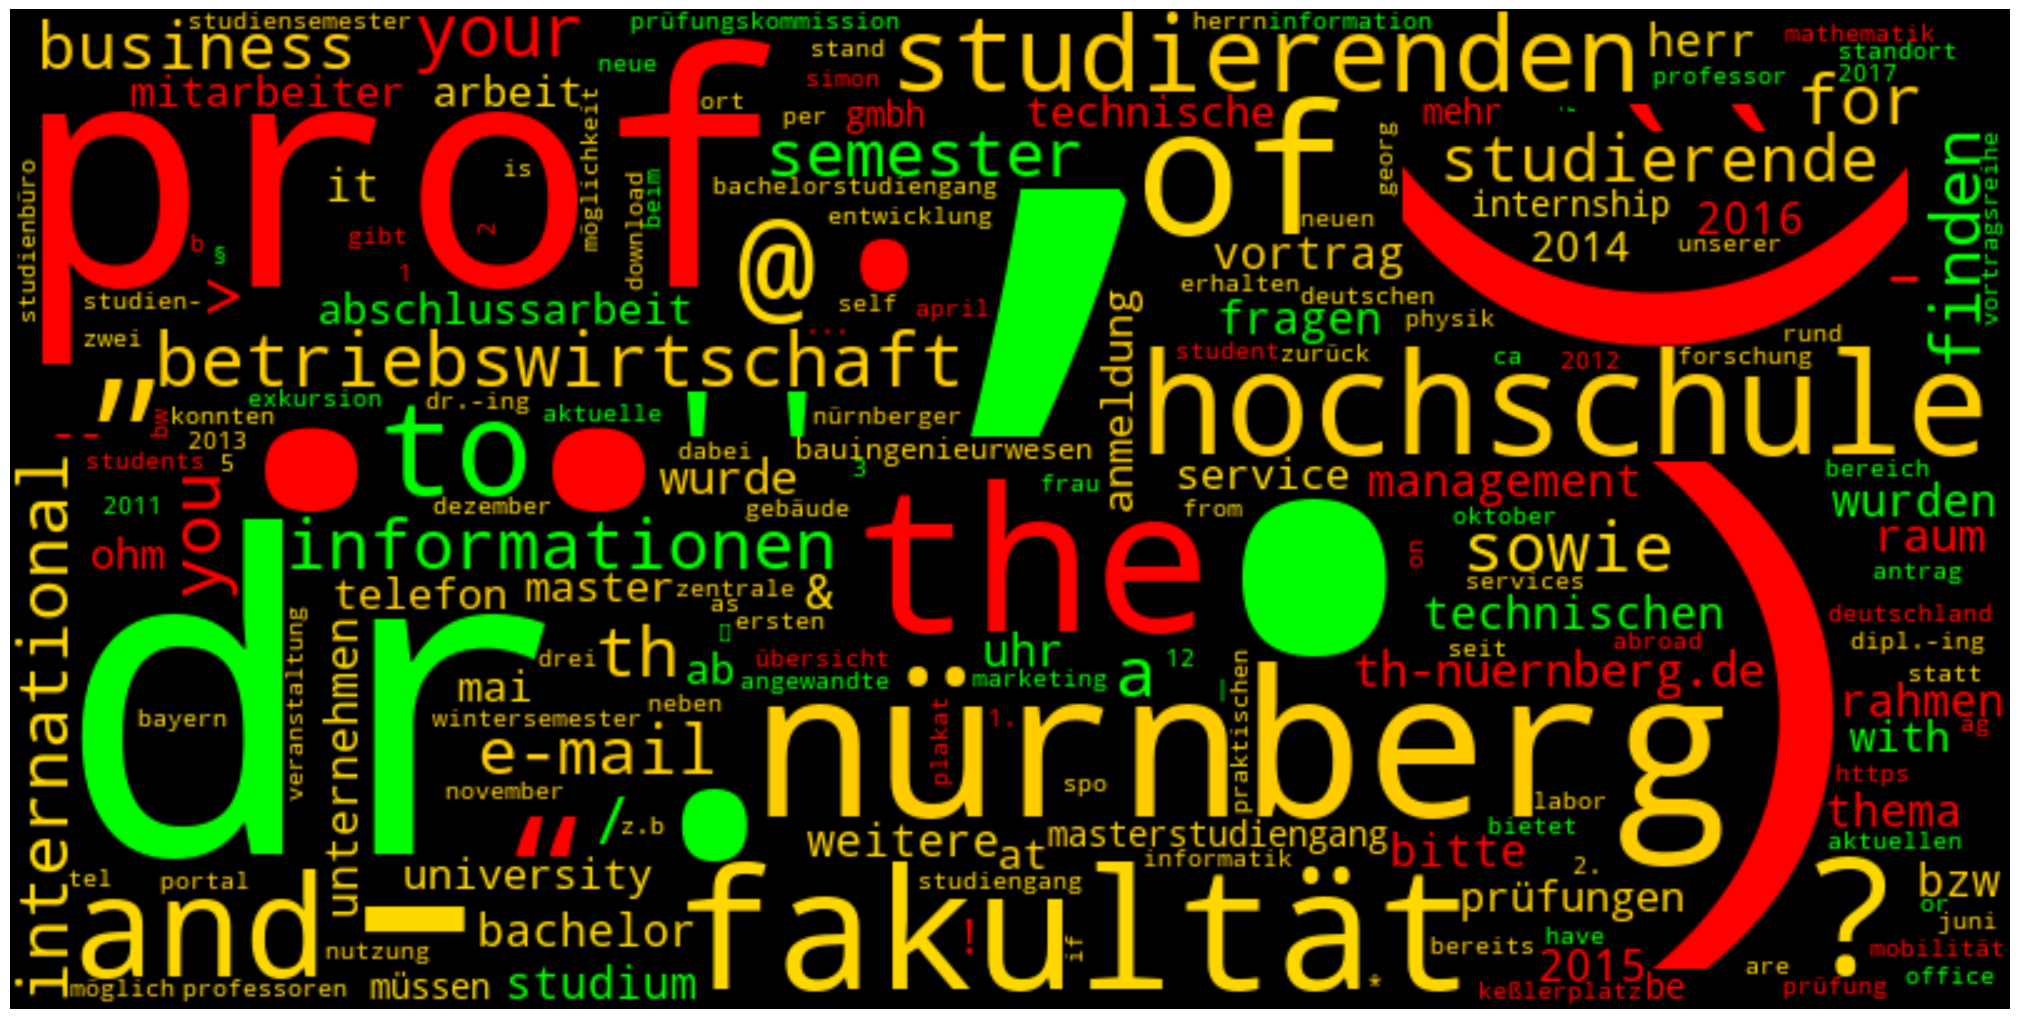

In [43]:
download('stopwords')

# Funktion zum Erzeugen der Word Cloud
def txa_wordcloud(list_of_words, bg_color="black", mask=None):
    stop_words = set(stopwords.words('german'))
    filtered_words = [word for word in list_of_words if word.lower() not in stop_words]
    colors = ["#FF0000", "#FFCD00", "#FFD800", "#00FF00"]
    colormap = plt.cm.colors.ListedColormap(colors)

    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=colormap, max_words=200, mask=mask) 
    wc.generate_from_frequencies(FreqDist(filtered_words))

    fig = plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

whole_text = " ".join(df["text"])
whole_text = whole_text.replace("\n", "").lower()
whole_text_list = word_tokenize(whole_text)

txa_wordcloud(whole_text_list)
